In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("✅ Libraries loaded successfully!")


✅ Libraries loaded successfully!


In [3]:
df = pd.read_csv("Dataset .csv")   # note the space before .csv
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.isnull().sum()


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
df.describe()


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


Top 3 cuisines:
Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


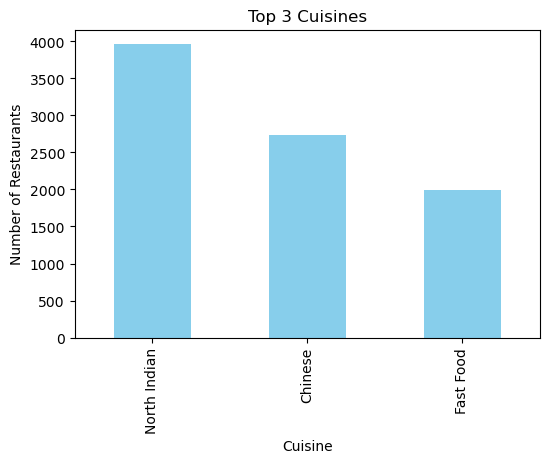

In [8]:
# Check top cuisines
cuisines = df['Cuisines'].dropna().astype(str).str.replace('/', ',')
cuisines_exploded = cuisines.str.split(',').explode().str.strip()
top3 = cuisines_exploded.value_counts().head(3)

print("Top 3 cuisines:")
print(top3)

# Plotting a bar chart
plt.figure(figsize=(6,4))
top3.plot(kind='bar', color='skyblue')
plt.title("Top 3 Cuisines")
plt.xlabel("Cuisine")
plt.ylabel("Number of Restaurants")
plt.show()


Top 10 cities by restaurant count:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Amritsar          21
Guwahati          21
Name: count, dtype: int64


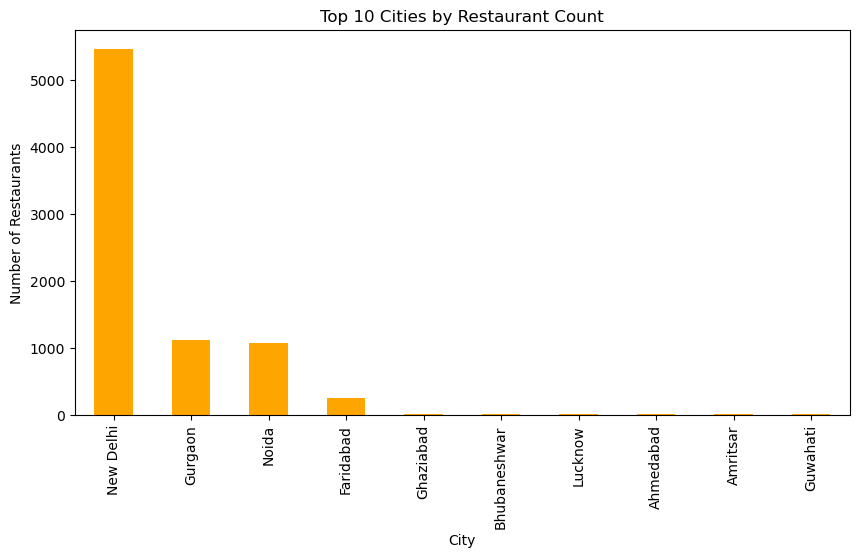


Top 10 cities by average rating:
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Secunderabad        4.500000
Lincoln             4.500000
Name: Aggregate rating, dtype: float64


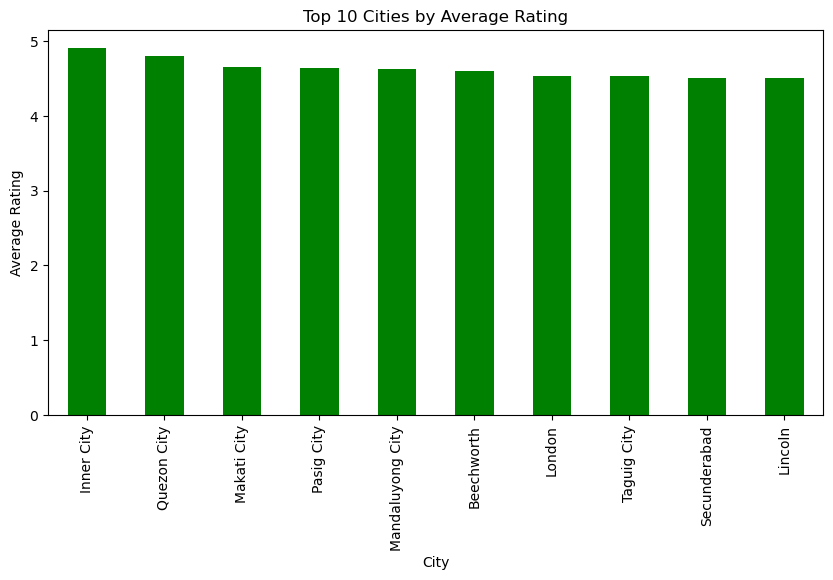

In [9]:
# City Analysis: Number of restaurants per city
city_counts = df['City'].value_counts().head(10)

print("Top 10 cities by restaurant count:")
print(city_counts)

# Bar chart of top 10 cities
plt.figure(figsize=(10,5))
city_counts.plot(kind='bar', color='orange')
plt.title("Top 10 Cities by Restaurant Count")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.show()

# Average rating per city
city_avg = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 cities by average rating:")
print(city_avg)

# Bar chart for average rating
plt.figure(figsize=(10,5))
city_avg.plot(kind='bar', color='green')
plt.title("Top 10 Cities by Average Rating")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.show()

Price Range Distribution:
Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64


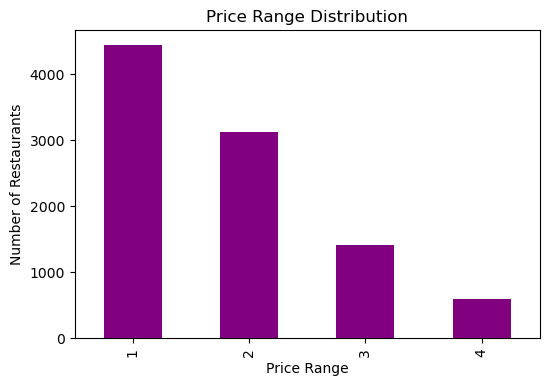

In [10]:
# Price Range Distribution
price_counts = df['Price range'].value_counts().sort_index()

print("Price Range Distribution:")
print(price_counts)

# Bar chart
plt.figure(figsize=(6,4))
price_counts.plot(kind='bar', color='purple')
plt.title("Price Range Distribution")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.show()

Online Delivery Availability:
Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64


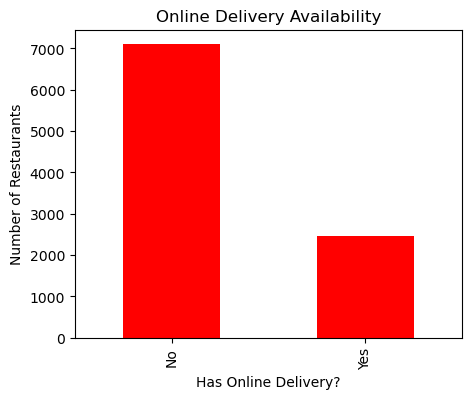


Average Ratings (Online vs Offline):
Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64


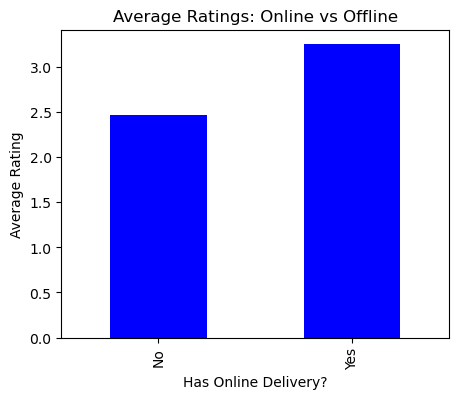

In [11]:
# Online Delivery Availability
online_counts = df['Has Online delivery'].value_counts()

print("Online Delivery Availability:")
print(online_counts)

# Bar chart
plt.figure(figsize=(5,4))
online_counts.plot(kind='bar', color='red')
plt.title("Online Delivery Availability")
plt.xlabel("Has Online Delivery?")
plt.ylabel("Number of Restaurants")
plt.show()

# Compare average ratings between online and offline
online_ratings = df.groupby('Has Online delivery')['Aggregate rating'].mean()
print("\nAverage Ratings (Online vs Offline):")
print(online_ratings)

# Bar chart for rating comparison
plt.figure(figsize=(5,4))
online_ratings.plot(kind='bar', color='blue')
plt.title("Average Ratings: Online vs Offline")
plt.xlabel("Has Online Delivery?")
plt.ylabel("Average Rating")
plt.show()